<a href="https://colab.research.google.com/github/paragajg/DSB8/blob/main/Cryptocurrency_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Flow of analysis
1. Import relevant libraries
2. Load data from binance exchange for Bitcoin / USDT
3. Clean OHLCV data
4. Method for Simple Moving Range (SMA) for 7 and 20 days
5. Plot line graph of Price vs SMA7 and SMA20

In [ ]:
!pip install mpl_finance ccxt

In [16]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import time
%matplotlib inline

In [2]:
exchange = ccxt.binance()

In [4]:
if exchange.has['fetchOHLCV']:
  ticker = "BTC/USDT"
  since = exchange.parse8601('2021-03-01T00:00:00Z')
  
  all_orders = []
  while since < exchange.milliseconds ():
      # symbol = None  # change for your symbol
      limit = 20  # change for your limit
      ohlcv = exchange.fetch_ohlcv(symbol = ticker, since= since,timeframe = '1d', limit = limit)
      # print(ohlcv[0])
      if len(ohlcv):
          since = ohlcv[len(ohlcv) - 1][0] + 1
          all_orders += ohlcv
      else:
          break

    # for symbol in exchange.markets:
    #     time.sleep (exchange.rateLimit / 1000) # time.sleep wants seconds

    #     # print (symbol, exchange.fetch_ohlcv (symbol, '1d')) # one day

In [5]:
print(len(all_orders))


418


In [6]:
import datetime

In [7]:
def cleanData(ohlcv_list):
  temp = []
  for i in ohlcv_list:
    timestamp_with_ms = i[0]
    dt = datetime.datetime.fromtimestamp(timestamp_with_ms / 1000)
    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
    i[0] = dt
    temp.append(i)
  
  return  temp

In [8]:
data = cleanData(ohlcv_list= all_orders)

In [ ]:
data[0:2]

In [49]:
df = pd.DataFrame(data, columns=["date","o","h","l","c","v"])

In [50]:
df.head()

,date,o,h,l,c,v
0,2021-03-01,45134.11,49790.00,44950.53,49587.03,85086.111648
1,2021-03-02,49595.76,50200.00,47047.60,48440.65,64221.062140
2,2021-03-03,48436.61,52640.00,48100.71,50349.37,81035.913705
3,2021-03-04,50349.37,51773.88,47500.00,48374.09,82649.716829
4,2021-03-05,48374.09,49448.93,46300.00,48751.71,78192.496372


# Data exploration
1. Data statistics

In [40]:
df.describe()

,o,h,l,c,v
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,46838.870813,48109.183852,45367.485622,46825.735933,58576.653562
std,8910.068815,9026.295343,8788.225596,8917.088106,33058.047461
min,29790.340000,31063.070000,28805.000000,29790.350000,15805.447180
25%,39754.945000,40877.770000,38542.297500,39689.385000,38922.876665
50%,46175.380000,47295.495000,44591.950000,46174.065000,51037.607404
75%,54813.790000,56665.597500,53178.172500,54814.922500,69824.150247
max,67525.820000,69000.000000,66222.400000,67525.830000,354347.243161


In [51]:
df['SMA7'] = df['c'].rolling(7).mean()
df['SMA20'] = df['c'].rolling(20).mean()
df['SMA200'] = df['c'].rolling(200).mean()
# removing all the NULL values using 
# dropna() method
df.dropna(inplace=True)
# printing Dataframe
df.head(n=10)

,date,o,h,l,c,v,SMA7,SMA20,SMA200
199,2021-09-16,48121.40,48557.00,47021.10,47737.82,40725.088950,46280.188571,47870.4100,45873.07935
200,2021-09-17,47737.81,48150.00,46699.56,47299.98,34461.927760,46630.055714,47790.6415,45861.64410
201,2021-09-18,47299.98,48843.20,47035.56,48292.74,30906.470380,47075.634286,47766.8870,45860.90455
202,2021-09-19,48292.75,48372.83,46829.18,47241.75,29847.243490,47249.421429,47779.8290,45845.36645
203,2021-09-20,47241.75,47347.25,42500.00,43015.62,78003.524443,46974.405714,47575.5655,45818.57410
204,2021-09-21,43016.64,43639.00,39600.00,40734.38,84534.080485,46063.385714,47171.7585,45778.48745
205,2021-09-22,40734.09,44000.55,40565.39,43543.61,58349.055420,45409.414286,46886.6070,45751.79450
206,2021-09-23,43546.37,44978.00,43069.09,44865.26,48699.576550,44999.048571,46629.9130,45721.26205
207,2021-09-24,44865.26,45200.00,40675.00,42810.57,84113.426292,44357.704286,46274.6595,45673.43905
208,2021-09-25,42810.58,42966.84,41646.28,42670.64,33594.571890,43554.547143,45820.3475,45612.36975


# Plot Line graph

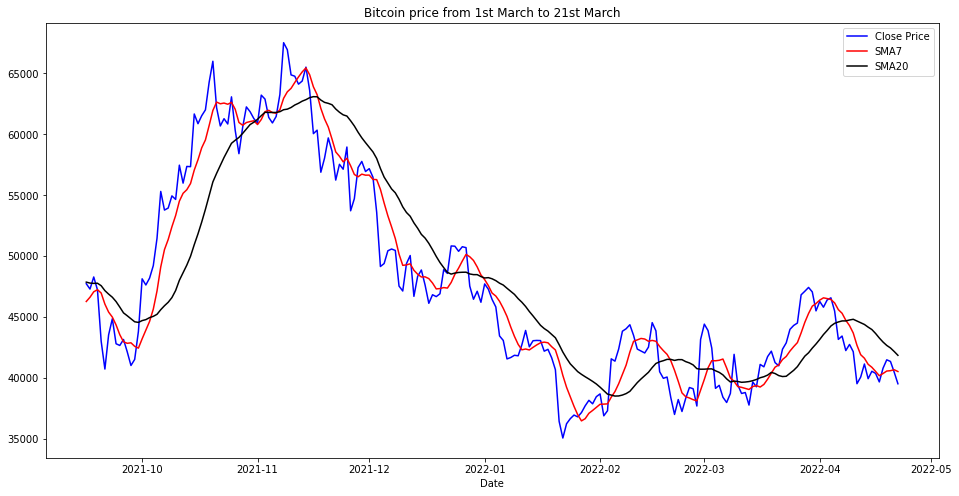

In [52]:
# Line Charts
plt.figure(figsize=(16,8))
plt.plot(df.date, df.c, color='blue', label= 'Close Price') #plotting the initial datapoints
plt.plot(df.date, df.SMA7, color='red', label= 'SMA7') #plotting the line made by linear regression
plt.plot(df.date, df.SMA20, color='black', label= 'SMA20')

plt.title('Bitcoin price from 1st March to 21st March')
plt.legend()
plt.xlabel('Date')
plt.show()

In [43]:
import matplotlib.dates as mpdates

<Figure size 1152x576 with 0 Axes>

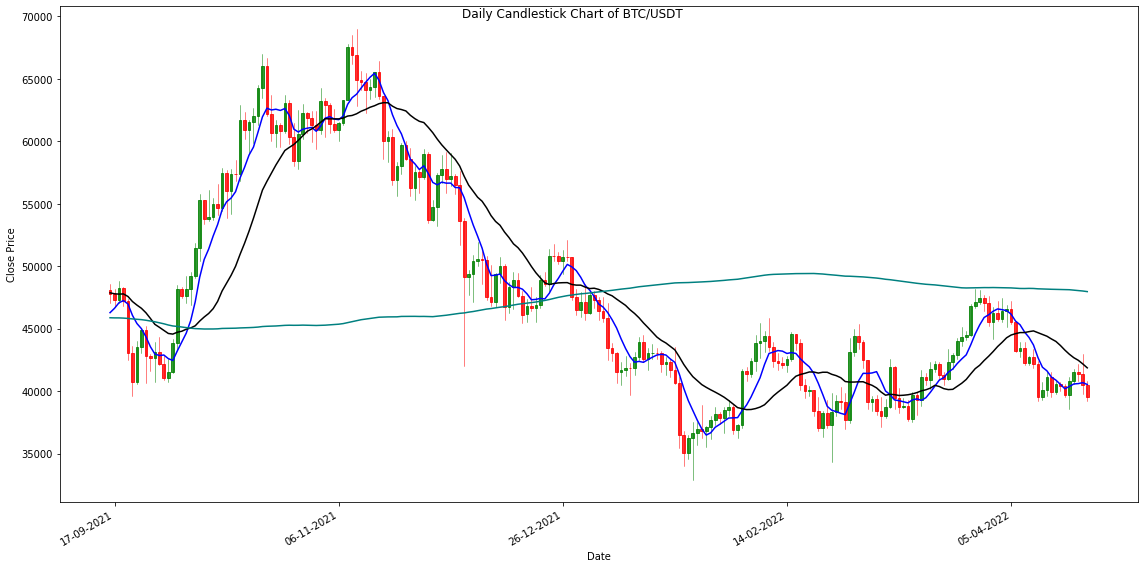

In [55]:
# Creating Subplots
plt.figure(figsize=(16,8))
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(8)
Df = df.copy()

try:
  Df['date'] = Df['date'].map(mpdates.date2num)
except:
  pass

candlestick_ohlc(ax, Df[["date","o","h","l","c"]].values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.plot(Df.date, Df.SMA7, color='blue', label= 'SMA7') #plotting the line made by linear regression
plt.plot(Df.date, Df.SMA20, color='black', label= 'SMA20')
plt.plot(Df.date, Df.SMA200, color='teal', label= 'SMA200')
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
fig.suptitle('Daily Candlestick Chart of BTC/USDT')

# Formatting Date
date_format = mpdates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

In [56]:
import plotly.graph_objects as go

In [60]:
fig = go.Figure(data=[go.Candlestick(
    x=df['date'],
    open=df['o'], high=df['h'],
    low=df['l'], close=df['c'],
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.add_trace(go.Scatter(x=df["date"], y=df["SMA200"],
                    mode='lines',
                    name='SMA200',line=dict(color="teal")))

fig.update_layout(plot_bgcolor='white')

fig.show()